# Human Activity Recognition with Smartphones

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Read train and test data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape

(7352, 563)

In [4]:
test_data.shape

(2947, 563)

In [5]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


Check for null values in training data

In [24]:
train_data.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

Variables

In [25]:
activities = train_data['Activity'].unique()
activity_frequency= np.array(train_data['Activity'].value_counts())

In [26]:
activities

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

Plot data distribution

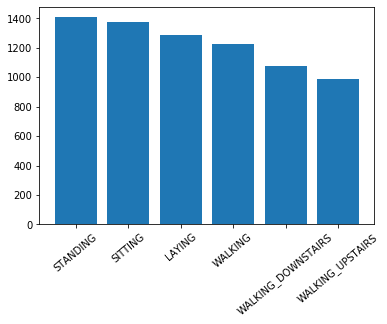

In [28]:
fig, ax = plt.subplots()
ax.bar(activities, activity_frequency)
plt.xticks(rotation = 40)
plt.show()

# Use PCA(Principal Component Analysis) for dimensionality reduction, 561 features is too much

In [12]:
#Separating the features
x = train_data.loc[:,train_data.columns[:-1]].values
x

array([[ 2.8858451e-01, -2.0294171e-02, -1.3290514e-01, ...,
         1.7994061e-01, -5.8626924e-02,  1.0000000e+00],
       [ 2.7841883e-01, -1.6410568e-02, -1.2352019e-01, ...,
         1.8028889e-01, -5.4316717e-02,  1.0000000e+00],
       [ 2.7965306e-01, -1.9467156e-02, -1.1346169e-01, ...,
         1.8063731e-01, -4.9117815e-02,  1.0000000e+00],
       ...,
       [ 2.7338737e-01, -1.7010616e-02, -4.5021828e-02, ...,
         2.4914484e-01,  4.0811188e-02,  3.0000000e+01],
       [ 2.8965416e-01, -1.8843044e-02, -1.5828059e-01, ...,
         2.4643223e-01,  2.5339478e-02,  3.0000000e+01],
       [ 3.5150347e-01, -1.2423118e-02, -2.0386717e-01, ...,
         2.4680852e-01,  3.6694843e-02,  3.0000000e+01]])

In [13]:
#Separating the target
train_Y=train_data.loc[:,['Activity']].values
train_Y

array([['STANDING'],
       ['STANDING'],
       ['STANDING'],
       ...,
       ['WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS'],
       ['WALKING_UPSTAIRS']], dtype=object)

In [29]:
# Standardizing the features
#The main idea is to normalize/standardize (mean = 0 and standard deviation = 1) your features/variables/columns of X 
#before applying Machine learning techniques.
train_X = StandardScaler().fit_transform(x)
train_X

array([[ 0.20064157, -0.0636826 , -0.41962845, ...,  0.40794614,
        -0.00756789, -1.8288513 ],
       [ 0.05594788,  0.03148567, -0.25390836, ...,  0.40911698,
         0.00787517, -1.8288513 ],
       [ 0.07351535, -0.04341648, -0.07629468, ...,  0.4102883 ,
         0.02650234, -1.8288513 ],
       ...,
       [-0.01566765,  0.0167814 ,  1.13222107, ...,  0.64059683,
         0.34870928,  1.4025149 ],
       [ 0.21586648, -0.02812252, -0.86770988, ...,  0.63147758,
         0.29327564,  1.4025149 ],
       [ 1.09620157,  0.12919873, -1.67268082, ...,  0.63274259,
         0.33396081,  1.4025149 ]])

In [30]:
pca = PCA(.95)

In [31]:
principalComponents = pca.fit_transform(train_X)

In [32]:
#How much each component contributed
pca.explained_variance_ratio_.round(2)

array([0.51, 0.07, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  ])

In [33]:
#PCA variance - sum of the component's variance 
sum(pca.explained_variance_ratio_)

0.9500684950526493

In [34]:
#Put the components into a DataFrame
principalDf = pd.DataFrame(data=principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,-16.127876,2.165066,3.112131,-0.272678,6.793172,-4.126212,2.987745,-5.057888,-0.715449,-3.640292,...,0.834326,-1.328907,0.502374,-1.061385,0.026006,0.388330,1.222217,2.251594,-1.746086,-1.467099
1,-15.285529,1.400438,-0.714409,2.813515,4.259211,-1.963174,0.043776,-2.009881,0.565461,-0.184347,...,-0.010702,1.397823,0.623912,-0.662233,0.716414,0.285675,-1.370607,0.178359,-1.108520,-0.392422
2,-15.126334,2.486807,-1.789351,3.717822,4.173597,-1.267454,0.102934,-1.555753,0.633620,-0.677366,...,-0.008604,-0.760020,0.301808,0.543930,0.740743,0.051230,-0.009170,0.287613,0.284680,0.370202
3,-15.340192,3.929089,-1.823029,2.567368,3.197204,-0.854802,0.561289,-1.991418,1.155317,-1.495072,...,0.746574,1.406558,0.328643,0.018986,1.884199,0.323392,0.122850,-0.065122,0.229700,-0.582131
4,-15.534146,4.611814,-2.218282,2.897450,3.073507,-0.989951,-1.026249,-0.947489,0.641201,1.119084,...,-0.096710,0.864950,0.607734,0.340679,0.302619,-0.175128,-1.196262,0.723121,0.525153,-0.463433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.456717,-12.546903,2.026290,3.457852,-1.510678,-2.762406,-3.579238,2.447927,0.387205,1.311320,...,-0.424195,-0.314114,-0.548439,-0.111004,0.762761,0.240657,0.903239,0.027325,-0.823402,-0.099446
7348,14.214403,-10.264201,2.405790,2.802797,-1.310661,-4.399022,-2.201077,0.093568,-0.586919,0.703852,...,-0.514534,-0.762717,-0.612031,0.011257,-0.026095,0.521552,0.353237,-0.587261,-1.095739,0.826588
7349,14.325088,-12.271555,4.053320,3.849882,-2.847266,-3.680110,-3.935536,-0.794058,-0.822107,-1.571190,...,-0.464884,0.251906,-0.410443,-0.643147,0.837508,0.202909,0.355033,-0.142367,-1.326103,-0.078968
7350,12.867698,-14.081814,2.942104,5.013533,-3.926981,-2.203410,-5.403362,0.392192,-0.951791,-1.648782,...,0.148597,0.525963,-0.398956,-0.615342,-0.174196,-0.615597,-0.228164,0.207903,-0.860923,-0.445729


In [37]:
#Add the target to the DataFrame
finalDf = pd.concat([principalDf, train_data[['Activity']]], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,Activity
0,-16.127876,2.165066,3.112131,-0.272678,6.793172,-4.126212,2.987745,-5.057888,-0.715449,-3.640292,...,-1.328907,0.502374,-1.061385,0.026006,0.388330,1.222217,2.251594,-1.746086,-1.467099,STANDING
1,-15.285529,1.400438,-0.714409,2.813515,4.259211,-1.963174,0.043776,-2.009881,0.565461,-0.184347,...,1.397823,0.623912,-0.662233,0.716414,0.285675,-1.370607,0.178359,-1.108520,-0.392422,STANDING
2,-15.126334,2.486807,-1.789351,3.717822,4.173597,-1.267454,0.102934,-1.555753,0.633620,-0.677366,...,-0.760020,0.301808,0.543930,0.740743,0.051230,-0.009170,0.287613,0.284680,0.370202,STANDING
3,-15.340192,3.929089,-1.823029,2.567368,3.197204,-0.854802,0.561289,-1.991418,1.155317,-1.495072,...,1.406558,0.328643,0.018986,1.884199,0.323392,0.122850,-0.065122,0.229700,-0.582131,STANDING
4,-15.534146,4.611814,-2.218282,2.897450,3.073507,-0.989951,-1.026249,-0.947489,0.641201,1.119084,...,0.864950,0.607734,0.340679,0.302619,-0.175128,-1.196262,0.723121,0.525153,-0.463433,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,15.456717,-12.546903,2.026290,3.457852,-1.510678,-2.762406,-3.579238,2.447927,0.387205,1.311320,...,-0.314114,-0.548439,-0.111004,0.762761,0.240657,0.903239,0.027325,-0.823402,-0.099446,WALKING_UPSTAIRS
7348,14.214403,-10.264201,2.405790,2.802797,-1.310661,-4.399022,-2.201077,0.093568,-0.586919,0.703852,...,-0.762717,-0.612031,0.011257,-0.026095,0.521552,0.353237,-0.587261,-1.095739,0.826588,WALKING_UPSTAIRS
7349,14.325088,-12.271555,4.053320,3.849882,-2.847266,-3.680110,-3.935536,-0.794058,-0.822107,-1.571190,...,0.251906,-0.410443,-0.643147,0.837508,0.202909,0.355033,-0.142367,-1.326103,-0.078968,WALKING_UPSTAIRS
7350,12.867698,-14.081814,2.942104,5.013533,-3.926981,-2.203410,-5.403362,0.392192,-0.951791,-1.648782,...,0.525963,-0.398956,-0.615342,-0.174196,-0.615597,-0.228164,0.207903,-0.860923,-0.445729,WALKING_UPSTAIRS


# K Neares Neighbors

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [59]:
#Train Data
X_train = principalDf
y_train = train_data['Activity']

In [60]:
#Test Data
X_test = test_data.loc[:,test_data.columns[:-1]]
y_test = test_data['Activity']

In [61]:
knn = KNeighborsClassifier(n_neighbors=1)

In [62]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [57]:
pred = knn.predict(X_test)

ValueError: query data dimension must match training data dimension